<h1><center>🧠Stroke Data Analysis🔎</center></h1>
<h3><center>🩺(Prediction at the end)🔮</center></h3>
<center><img src= "https://storage.googleapis.com/kaggle-datasets-images/1120859/1882037/04da2fb7763e553bdf251d5adf6f88d9/data-original.jpg?t=2021-01-26-19-57-05" alt ="Titanic" style='width: 400px;'></center>

<h3>Overview</h3>
<p>
A stroke occurs when the blood supply to part of your brain is interrupted or reduced, preventing brain tissue from getting oxygen and nutrients. Brain cells begin to die in minutes.

A stroke is a medical emergency, and prompt treatment is crucial. Early action can reduce brain damage and other complications.

The good news is that many fewer Americans die of stroke now than in the past. Effective treatments can also help prevent disability from stroke.
</p>

<h3>Symptoms</h3>
<p>

If you or someone you're with may be having a stroke, pay particular attention to the time the symptoms began. Some treatment options are most effective when given soon after a stroke begins.

Signs and symptoms of stroke include:

* Trouble speaking and understanding what others are saying. You may experience confusion, slur your words or have difficulty understanding speech.
    
* Paralysis or numbness of the face, arm or leg. You may develop sudden numbness, weakness or paralysis in your face, arm or leg. This often affects just one side of your body. Try to raise both your arms over your head at the same time. If one arm begins to fall, you may be having a stroke. Also, one side of your mouth may droop when you try to smile.
    
* Problems seeing in one or both eyes. You may suddenly have blurred or blackened vision in one or both eyes, or you may see double.
    
* Headache. A sudden, severe headache, which may be accompanied by vomiting, dizziness or altered consciousness, may indicate that you're having a stroke.
    
* Trouble walking. You may stumble or lose your balance. You may also have sudden dizziness or a loss of coordination.
    
</p>

# Exploratory Data Analysis

## Aim :
- Understand the data ("A small step forward is better than a big one backwards")
- Begin to develop a modelling strategy

## Features

1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not

*Note: "Unknown" in smoking_status means that the information is unavailable for this patient

## Base Checklist
#### Shape Analysis :
- **target feature** : stroke
- **rows and columns** : 5110, 12
- **features types** : qualitatives :  5, quantitatives : 7
- **NaN analysis** :
    - NaN (0 % of NaN)

#### Columns Analysis :
- **Target Analysis** :
    - Balanced (Yes/No) : No
    - Percentages : 95% No stroke

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA

from dataprep.eda import create_report
from dataprep.eda import plot_missing
from dataprep.eda import plot_correlation
from dataprep.eda import plot

from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report, roc_curve
from sklearn.model_selection import learning_curve, cross_val_score, GridSearchCV
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler,StandardScaler,MinMaxScaler

import warnings
warnings.filterwarnings('ignore')

## Dataset Analysis

In [3]:
data = pd.read_csv('../input/stroke-prediction-dataset/healthcare-dataset-stroke-data.csv')
df = data.copy()
pd.set_option('display.max_row',df.shape[0])
pd.set_option('display.max_column',df.shape[1]) 
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
code = {
        'Unknown':'NaN'
        }

df = df.replace({'smoking_status':code})

  0%|          | 0/161 [00:00<?, ?it/s]


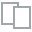
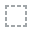
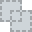
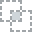
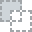
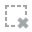
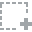
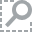
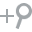
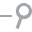
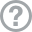
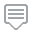
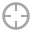
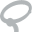
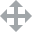
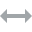
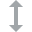
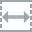
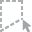
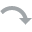
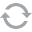
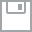
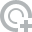
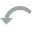
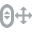
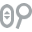
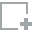
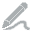
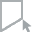
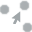
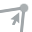
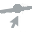

In [5]:
plot_missing(df)

In [6]:
print('There is' , df.shape[0] , 'rows')
print('There is' , df.shape[1] , 'columns')

There is 5110 rows
There is 12 columns


In [7]:
df.duplicated().sum() # There are no duplicates

0

## Visualising Target and Features

In [8]:
# Visualising target balance
df['stroke'].value_counts(normalize=True) #Classes déséquilibrées

0    0.951272
1    0.048728
Name: stroke, dtype: float64

In [9]:
# Qualitative features
for col in df.select_dtypes("object"):
    print(f'{col :-<50} {df[col].unique()}')

gender-------------------------------------------- ['Male' 'Female' 'Other']
ever_married-------------------------------------- ['Yes' 'No']
work_type----------------------------------------- ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type------------------------------------ ['Urban' 'Rural']
smoking_status------------------------------------ ['formerly smoked' 'never smoked' 'smokes' 'NaN']


In [ ]:
# Quantitative features
for col in df.select_dtypes(include=['float64','int64']):
    plt.figure()
    sns.displot(df[col],kind='kde',height=3)
    plt.show()

# A bit of data engineering ...

In [11]:
def encoding(df):
    code = {
        'Male':0,
        'Female':1,
        'Other':2,
        'Yes':1,
        'No':0,
        'Private':0,
        'Self-employed':1,
        'Govt_job':2,
        'children':3,
        'Never_worked':4,
        'Urban':0,
        'Rural':1,
        'formerly smoked':0,
        'never smoked':1,
        'smokes':2
           }
    for col in df.select_dtypes('object'):
        df.loc[:,col]=df[col].map(code)
        
    return df

def imputation(df):
    
    df = df.dropna(axis=0)
    
    return df

def feature_engineering(df):
    useless_columns = ['id'] # Let's consider we want to use all the features
    df = df.drop(useless_columns,axis=1)
    return df

In [12]:
def preprocessing(df):
    df = encoding(df)
    df = feature_engineering(df)
    df = imputation(df)
    
    X = df.drop('stroke',axis=1)
    y = df['stroke']    
      
    return df,X,y

## Detailed Analysis

In [13]:
df = data.copy()
df,X,y = preprocessing(df)

In [14]:
riskyDF = df[y == 1]
safeDF = df[y == 0]

<Figure size 288x288 with 0 Axes>

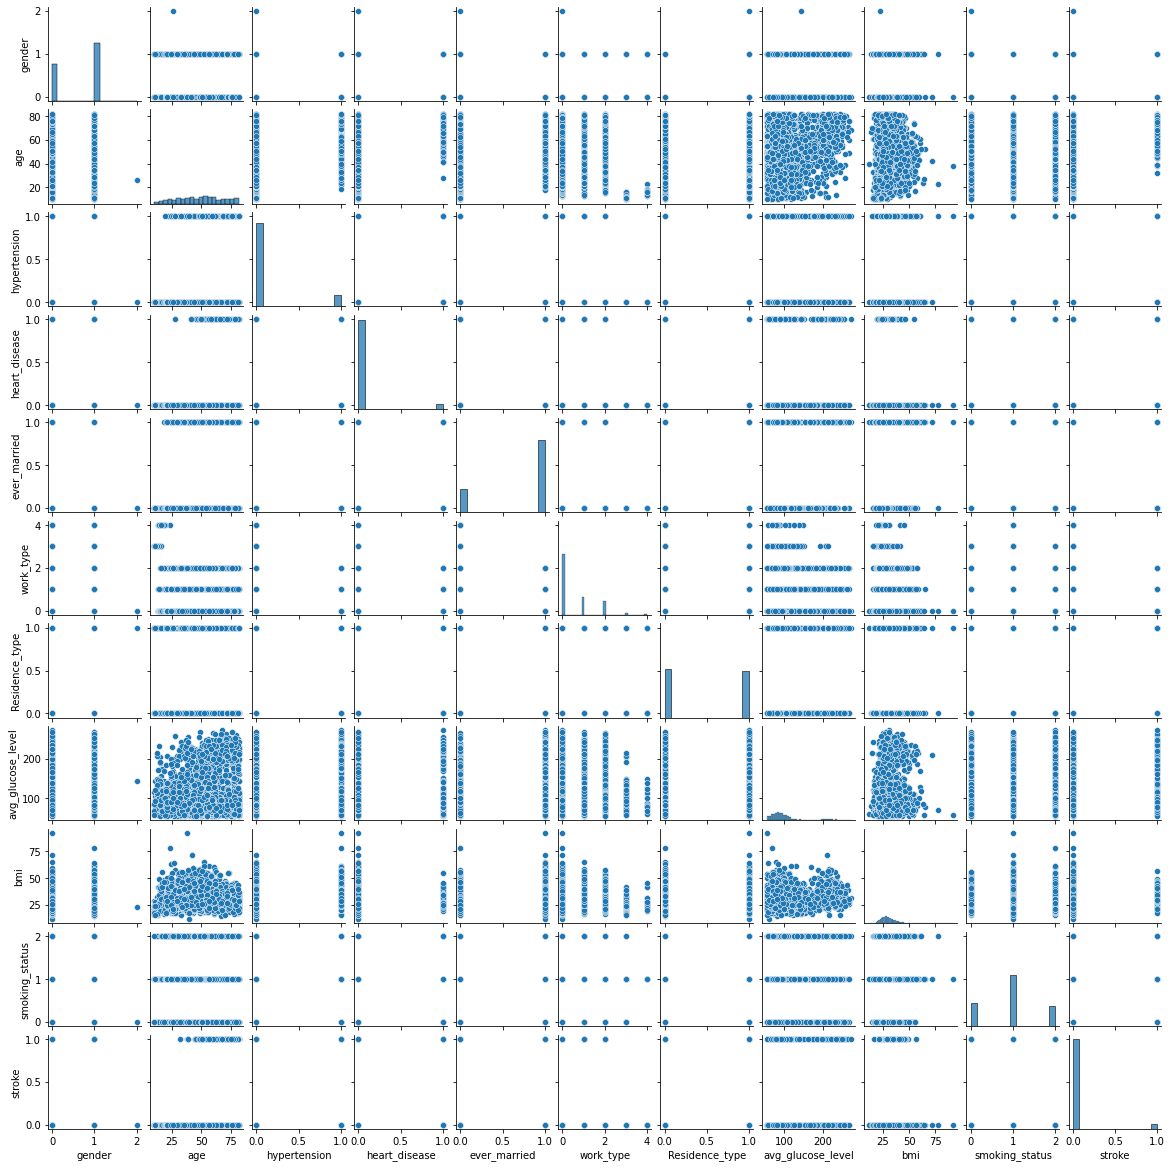

In [15]:
plt.figure(figsize=(4,4))
sns.pairplot(df,height=1.5)
plt.show()

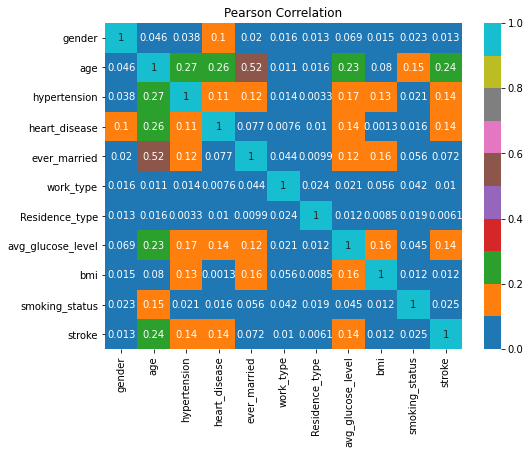

Residence_type       0.006068
work_type            0.010397
bmi                  0.011673
gender               0.012594
smoking_status       0.024624
ever_married         0.071691
heart_disease        0.138553
avg_glucose_level    0.140453
hypertension         0.143647
age                  0.242495
stroke               1.000000
Name: stroke, dtype: float64


In [16]:
corr = df.corr(method='pearson').abs()

fig = plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='tab10', vmin=0, vmax=+1)
plt.title('Pearson Correlation')
plt.show()

print (df.corr()['stroke'].abs().sort_values())

### Comments

It looks like we have some very useful features here, with a correlation > 0.1.
The following features seems promising for predicting wether a patient will have a heart attack or not :
- **heart_disease**
- **avg_glucose_level**
- **hypertension**
- **age**

We can also notice that **ever_married** and **age** looks correlated, let's find out !

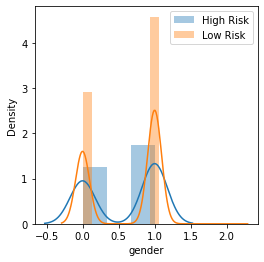

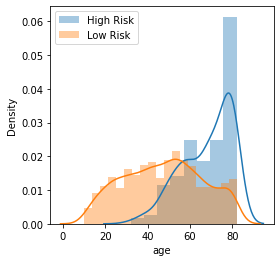

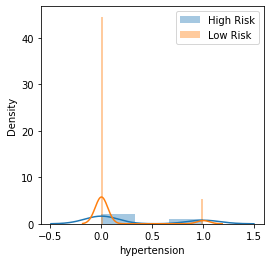

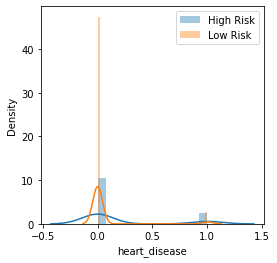

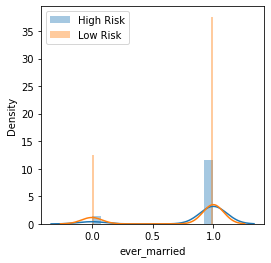

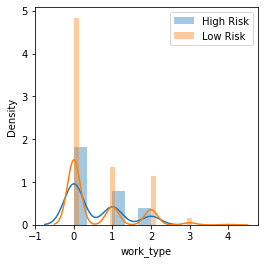

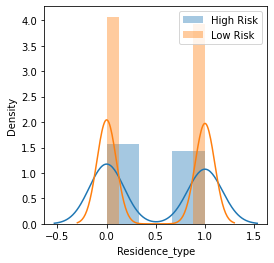

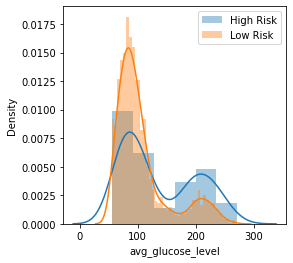

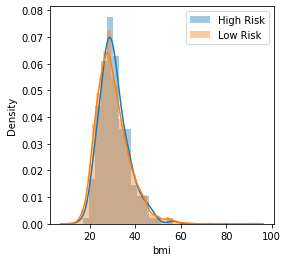

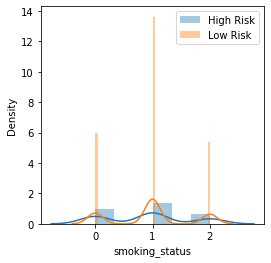

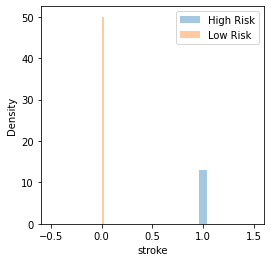

In [17]:
for col in df.select_dtypes(include=['float64','int64']):
    plt.figure(figsize=(4,4))
    sns.distplot(riskyDF[col],label='High Risk')
    sns.distplot(safeDF[col],label='Low Risk')
    plt.legend()
    plt.show()

<Figure size 288x288 with 0 Axes>

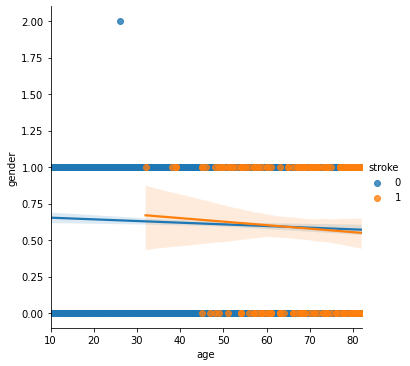

<Figure size 288x288 with 0 Axes>

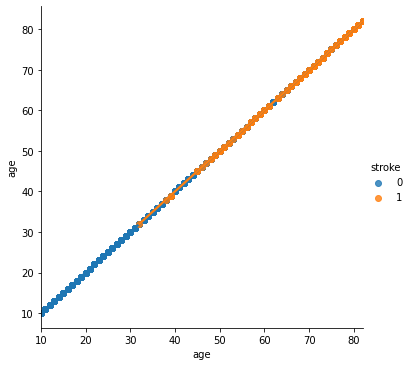

<Figure size 288x288 with 0 Axes>

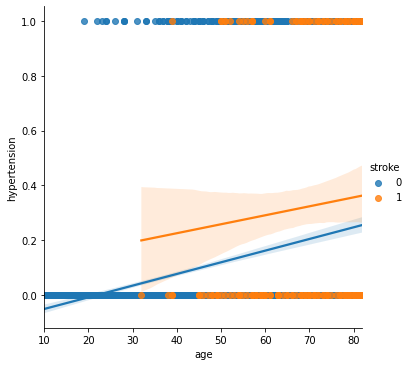

<Figure size 288x288 with 0 Axes>

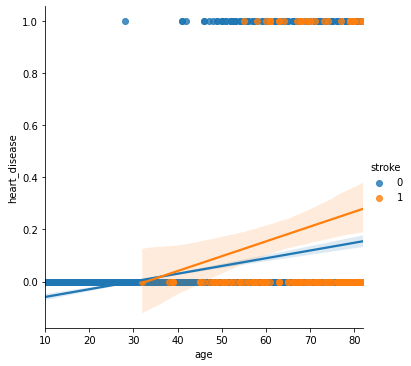

<Figure size 288x288 with 0 Axes>

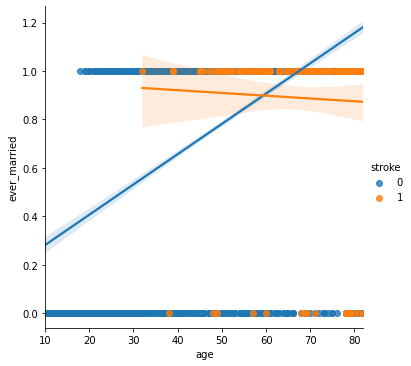

<Figure size 288x288 with 0 Axes>

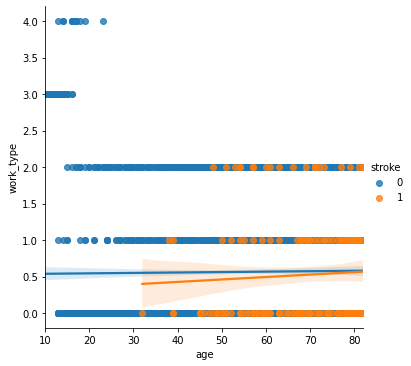

<Figure size 288x288 with 0 Axes>

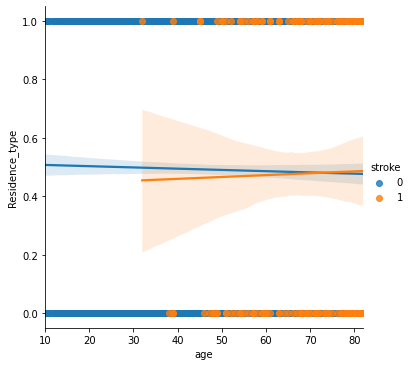

<Figure size 288x288 with 0 Axes>

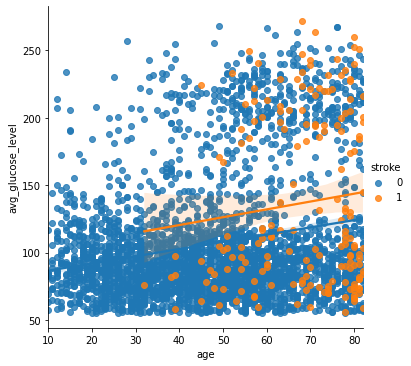

<Figure size 288x288 with 0 Axes>

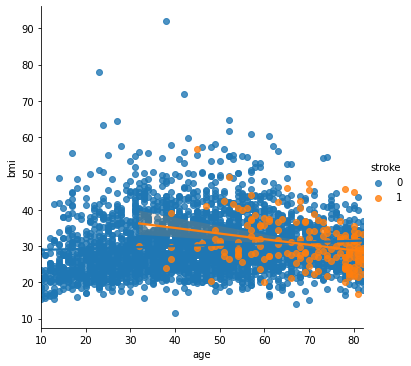

<Figure size 288x288 with 0 Axes>

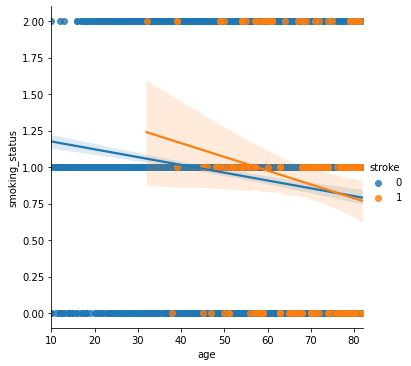

In [18]:
for col in X.select_dtypes(include=['float64','int64']):
    plt.figure(figsize=(4,4))
    sns.lmplot(x='age', y=col, hue='stroke', data=df)

# Modelling

In [20]:
df = data.copy()
df,X,y=preprocessing(df)
print(df['stroke'].value_counts())

0    3246
1     180
Name: stroke, dtype: int64


<h2 id="t4" style="margin-bottom: 18px">Resampling</h2>

A widely adopted technique for dealing with highly unbalanced datasets is called resampling. It consists of removing samples from the majority class (under-sampling) and / or adding more examples from the minority class (over-sampling).

![](https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/resampling.png)

Despite the advantage of balancing classes, these techniques also have their weaknesses (there is no free lunch). The simplest implementation of over-sampling is to duplicate random records from the minority class, which can cause overfitting. In under-sampling, the simplest technique involves removing random records from the majority class, which can cause loss of information.

Let's implement a basic example, which uses the <code>DataFrame.sample</code> method to get random samples each class:

In [21]:
# Class count
count_class_0, count_class_1 = df['stroke'].value_counts()

# Divide by class
df_class_0 = df[df['stroke'] == 0]
df_class_1 = df[df['stroke'] == 1]

Random under-sampling:
0    180
1    180
Name: stroke, dtype: int64


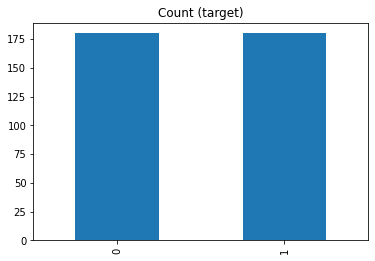

In [22]:
df_class_0_under = df_class_0.sample(count_class_1)
df_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_under['stroke'].value_counts())

df_under['stroke'].value_counts().plot(kind='bar', title='Count (target)');

In [23]:
trainset, testset = train_test_split(df_under, test_size=0.2, random_state=0)
print(trainset['stroke'].value_counts())
print(testset['stroke'].value_counts())

1    147
0    141
Name: stroke, dtype: int64
0    39
1    33
Name: stroke, dtype: int64


In [24]:
X_train = trainset.drop(['stroke'],axis=1)
y_train = trainset['stroke']
X_test = testset.drop(['stroke'],axis=1)
y_test = testset['stroke']

In [25]:
preprocessor = make_pipeline(MinMaxScaler())

PCAPipeline = make_pipeline(StandardScaler(), PCA(n_components=2,random_state=0))

RandomPipeline = make_pipeline(preprocessor,RandomForestClassifier(random_state=0))
AdaPipeline = make_pipeline(preprocessor,AdaBoostClassifier(random_state=0))
SVMPipeline = make_pipeline(preprocessor,SVC(random_state=0,probability=True))
KNNPipeline = make_pipeline(preprocessor,KNeighborsClassifier())
LRPipeline = make_pipeline(preprocessor,LogisticRegression(solver='sag'))

## PCA Analysis

In [26]:
PCA_df = pd.DataFrame(PCAPipeline.fit_transform(X))
PCA_df = pd.concat([PCA_df, y], axis=1)
PCA_df.head()

,0,1,stroke
0,3.387472,-1.753592,1.0
1,2.491508,-1.395831,NaN
2,0.368209,1.433647,1.0
3,2.271907,-0.093447,1.0
4,1.968330,-0.632106,1.0


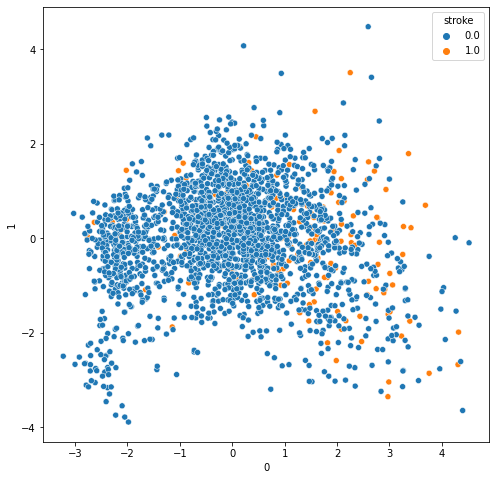

In [27]:
plt.figure(figsize=(8,8))
sns.scatterplot(PCA_df[0],PCA_df[1],hue=PCA_df['stroke'],palette=sns.color_palette("tab10", 2))
plt.show()

## Classification problem

In [28]:
dict_of_models = {'RandomForest': RandomPipeline,
'AdaBoost': AdaPipeline,
'SVM': SVMPipeline,
'KNN': KNNPipeline,
'LR': LRPipeline}

In [29]:
def evaluation(model):
    model.fit(X_train, y_train)
    # calculating the probabilities
    y_pred_proba = model.predict_proba(X_test)

    # finding the predicted valued
    y_pred = np.argmax(y_pred_proba,axis=1)
    print('Accuracy = ', accuracy_score(y_test, y_pred))
    print('-')
    print(confusion_matrix(y_test,y_pred))
    print('-')
    print(classification_report(y_test,y_pred))
    print('-')
    
    N, train_score, val_score = learning_curve(model, X_train, y_train, 
                                               cv=4, scoring='f1', 
                                               train_sizes=np.linspace(0.1,1,10))
    plt.figure(figsize=(12,8))
    plt.plot(N, train_score.mean(axis=1), label='train score')
    plt.plot(N, val_score.mean(axis=1), label='validation score')
    plt.legend()

---------------------------------
RandomForest
Accuracy =  0.7361111111111112
-
[[27 12]
 [ 7 26]]
-
              precision    recall  f1-score   support

           0       0.79      0.69      0.74        39
           1       0.68      0.79      0.73        33

    accuracy                           0.74        72
   macro avg       0.74      0.74      0.74        72
weighted avg       0.74      0.74      0.74        72

-
---------------------------------
AdaBoost
Accuracy =  0.7361111111111112
-
[[28 11]
 [ 8 25]]
-
              precision    recall  f1-score   support

           0       0.78      0.72      0.75        39
           1       0.69      0.76      0.72        33

    accuracy                           0.74        72
   macro avg       0.74      0.74      0.74        72
weighted avg       0.74      0.74      0.74        72

-
---------------------------------
SVM
Accuracy =  0.75
-
[[25 14]
 [ 4 29]]
-
              precision    recall  f1-score   support

           

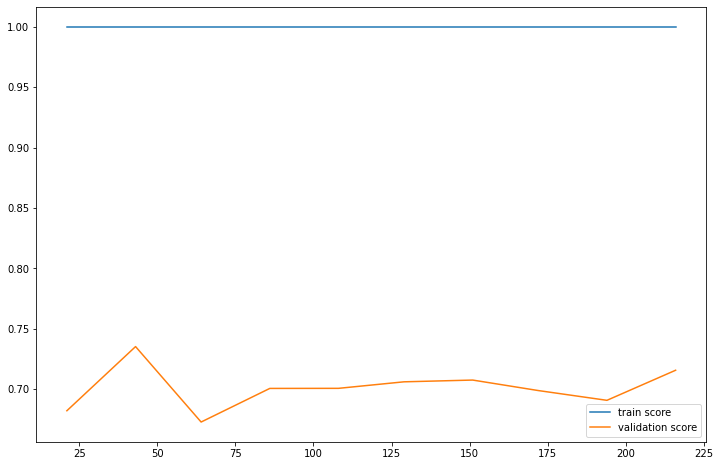

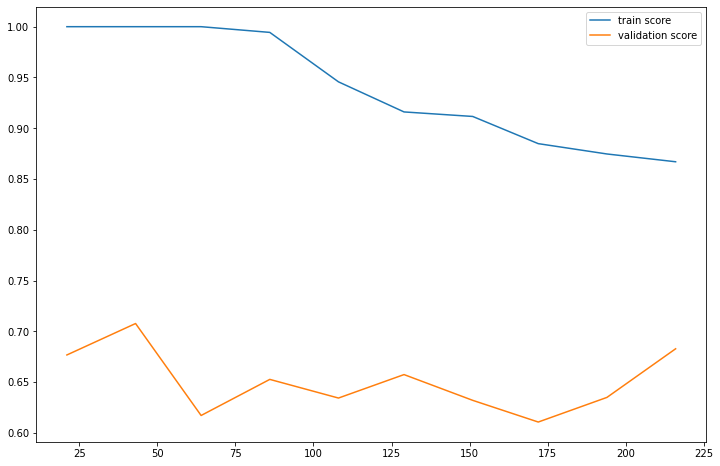

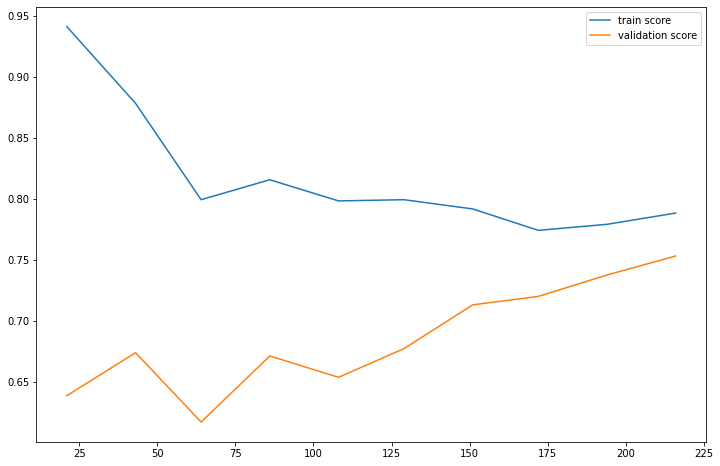

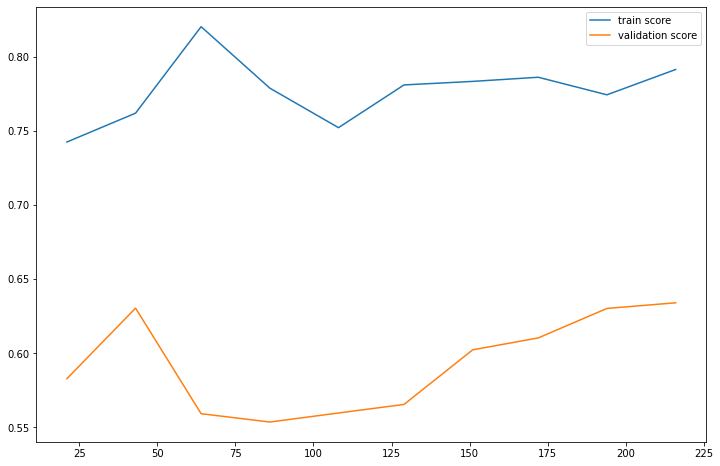

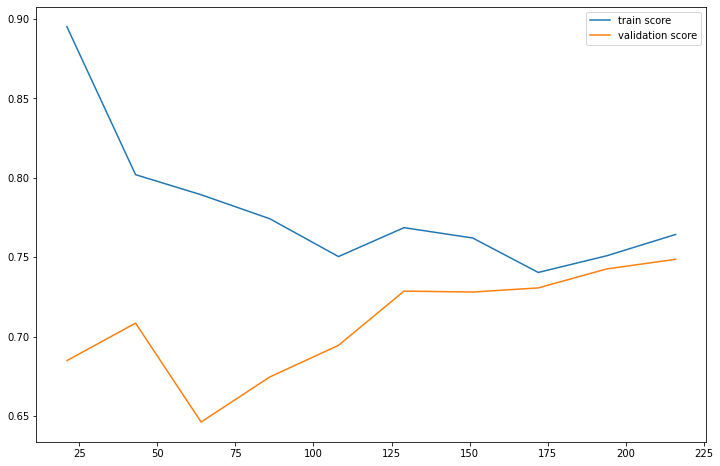

In [30]:
for name, model in dict_of_models.items():
    print('---------------------------------')
    print(name)
    evaluation(model)

# Tuning estimators

## RandomForest Optimization

In [31]:
from sklearn.model_selection import RandomizedSearchCV
RandomPipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'pipeline', 'randomforestclassifier', 'pipeline__memory', 'pipeline__steps', 'pipeline__verbose', 'pipeline__minmaxscaler', 'pipeline__minmaxscaler__copy', 'pipeline__minmaxscaler__feature_range', 'randomforestclassifier__bootstrap', 'randomforestclassifier__ccp_alpha', 'randomforestclassifier__class_weight', 'randomforestclassifier__criterion', 'randomforestclassifier__max_depth', 'randomforestclassifier__max_features', 'randomforestclassifier__max_leaf_nodes', 'randomforestclassifier__max_samples', 'randomforestclassifier__min_impurity_decrease', 'randomforestclassifier__min_impurity_split', 'randomforestclassifier__min_samples_leaf', 'randomforestclassifier__min_samples_split', 'randomforestclassifier__min_weight_fraction_leaf', 'randomforestclassifier__n_estimators', 'randomforestclassifier__n_jobs', 'randomforestclassifier__oob_score', 'randomforestclassifier__random_state', 'randomforestclassifier__verbose', 'randomforestclassifier__warm_s

In [32]:
hyper_params = {
    'randomforestclassifier__n_estimators':[10,100,150,250,400,600],
    'randomforestclassifier__criterion':['gini','entropy'],
    'randomforestclassifier__min_samples_split':[2,6,12],
    'randomforestclassifier__min_samples_leaf':[1,4,6,10],
    'randomforestclassifier__max_features':['auto','srqt','log2',int,float],
    'randomforestclassifier__n_jobs':[-1],
    'randomforestclassifier__verbose':[0,1,2],
    'randomforestclassifier__class_weight':['balanced','balanced_subsample'],
    'randomforestclassifier__n_jobs':[-1],
    'randomforestclassifier__n_jobs':[-1],
}

In [33]:
grid = RandomizedSearchCV(RandomPipeline,hyper_params,scoring='accuracy',n_iter=40)

In [ ]:
grid.fit(X_train,y_train)

In [35]:
print(grid.best_params_)
print(grid.best_score_)

{'randomforestclassifier__verbose': 1, 'randomforestclassifier__n_jobs': -1, 'randomforestclassifier__n_estimators': 400, 'randomforestclassifier__min_samples_split': 12, 'randomforestclassifier__min_samples_leaf': 10, 'randomforestclassifier__max_features': 'auto', 'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__class_weight': 'balanced'}
0.7258318209316396


In [36]:
ypred = grid.predict(X_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.83      0.74      0.78        39
           1       0.73      0.82      0.77        33

    accuracy                           0.78        72
   macro avg       0.78      0.78      0.78        72
weighted avg       0.78      0.78      0.78        72



[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 400 out of 400 | elapsed:    0.1s finished


## SVM Optimization

In [37]:
SVMPipeline.fit(X_train, y_train)
y_proba = SVMPipeline.predict_proba(X_test)
y_pred = np.argmax(y_proba,axis=1)

print("SVM : ", accuracy_score(y_test, y_pred))

SVM :  0.75


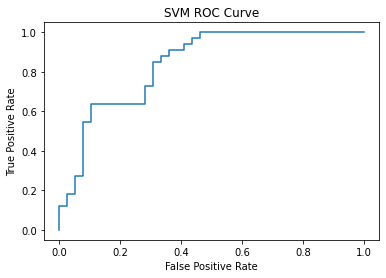

In [38]:
y_pred_prob = SVMPipeline.predict_proba(X_test)[:,1]

fpr,tpr,threshols=roc_curve(y_test,y_pred_prob)

plt.plot(fpr,tpr,label='SVM ROC Curve')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM ROC Curve")
plt.show()

In [39]:
SVMPipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'pipeline', 'svc', 'pipeline__memory', 'pipeline__steps', 'pipeline__verbose', 'pipeline__minmaxscaler', 'pipeline__minmaxscaler__copy', 'pipeline__minmaxscaler__feature_range', 'svc__C', 'svc__break_ties', 'svc__cache_size', 'svc__class_weight', 'svc__coef0', 'svc__decision_function_shape', 'svc__degree', 'svc__gamma', 'svc__kernel', 'svc__max_iter', 'svc__probability', 'svc__random_state', 'svc__shrinking', 'svc__tol', 'svc__verbose'])

In [40]:
from sklearn.utils.fixes import loguniform


hyper_params = {
    'svc__C': loguniform(1e0, 1e3),
    'svc__gamma': loguniform(1e-4, 1e-3),
    'svc__kernel': ['rbf'],
    'svc__class_weight':['balanced', None]
               }

In [41]:
grid = RandomizedSearchCV(SVMPipeline,hyper_params,scoring='accuracy',n_iter=40)

In [42]:
grid.fit(X_train,y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('pipeline',
                                              Pipeline(steps=[('minmaxscaler',
                                                               MinMaxScaler())])),
                                             ('svc',
                                              SVC(probability=True,
                                                  random_state=0))]),
                   n_iter=40,
                   param_distributions={'svc__C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f0b7ddf6f90>,
                                        'svc__class_weight': ['balanced', None],
                                        'svc__gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f0b7c706ed0>,
                                        'svc__kernel': ['rbf']},
                   scoring='accuracy')

In [43]:
print(grid.best_params_)
print(grid.best_score_)

{'svc__C': 544.1373660762124, 'svc__class_weight': 'balanced', 'svc__gamma': 0.0007754080272762147, 'svc__kernel': 'rbf'}
0.7500907441016335


In [44]:
ypred = grid.predict(X_test)
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.81      0.67      0.73        39
           1       0.68      0.82      0.74        33

    accuracy                           0.74        72
   macro avg       0.74      0.74      0.74        72
weighted avg       0.75      0.74      0.74        72



## XGBoost

Accuracy =  0.7361111111111112
-
[[27 12]
 [ 7 26]]
-
              precision    recall  f1-score   support

           0       0.79      0.69      0.74        39
           1       0.68      0.79      0.73        33

    accuracy                           0.74        72
   macro avg       0.74      0.74      0.74        72
weighted avg       0.74      0.74      0.74        72

-


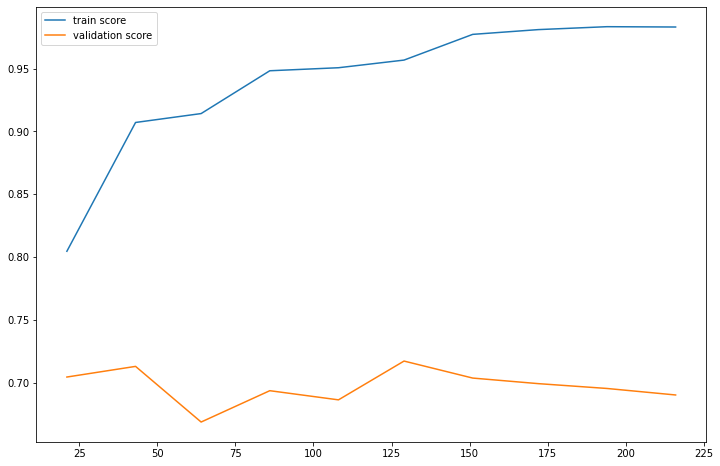

In [45]:
import xgboost as xgb
gbm = xgb.XGBClassifier(
 learning_rate = 0.05,
 n_estimators= 2000,
 max_depth= 4,
 min_child_weight= 2,
 #gamma=1,
 gamma=0.9,                        
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 eval_metric = 'logloss',
 nthread= -1,
 scale_pos_weight=1).fit(X_train, y_train)
evaluation (gbm)

# Best Estimator

In [46]:
best_classifier = RandomPipeline

In [ ]:
predictions = best_classifier.predict(X_test)
predictions_proba = best_classifier.predict_proba(X_test)
print(predictions_proba)

In [48]:
thresholds = [0.3,0.4,0.5,0.6,0.7,0.8]
best_t = 0.3
best_acc = 0
for t in thresholds:
    y_pred = (best_classifier.predict_proba(X_test)[:,1] >= t).astype(int)
    acc = accuracy_score(y_test, y_pred)
    if acc > best_acc:
        best_acc=acc
        best_t=t
print('Accuracy on test set :',round(best_acc*100),"%")
print('Best threshold :',best_t)

Accuracy on test set : 74 %
Best threshold : 0.5
